# Морозова Дарья, ИАД-2
# Домашнее задание № 4
## Ансамблевые методы

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [2]:
from google.colab import files

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
data = pd.read_csv('./diabetes.csv')

In [4]:
data.shape

(768, 9)

In [26]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Задание 1.
Есть ли пропущенные значения?
Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

Пропусков в столбцах нет:

In [7]:
print(data.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


Однако в некоторых колонках есть нулевые значения. Для признаков Pregnancies и Outcome наличие 0 допустимо, т.к. жещина могла никогда не рожать. В остальных признаках нули - это уже пропуски, заменим их средним значением для каждого признака.

In [0]:
for i in data.columns[1:-2]: # Убираем Pregnancies и Outcome
  data[i] = data[i].replace(to_replace = 0, value = data[i].mean())

In [29]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50,1
1,1,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31,0
2,8,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32,1
3,1,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30,0
6,3,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26,1
7,10,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29,0
8,2,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54,1


Теперь нулей нет там, где не надо.

### Задание 2.
Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых.

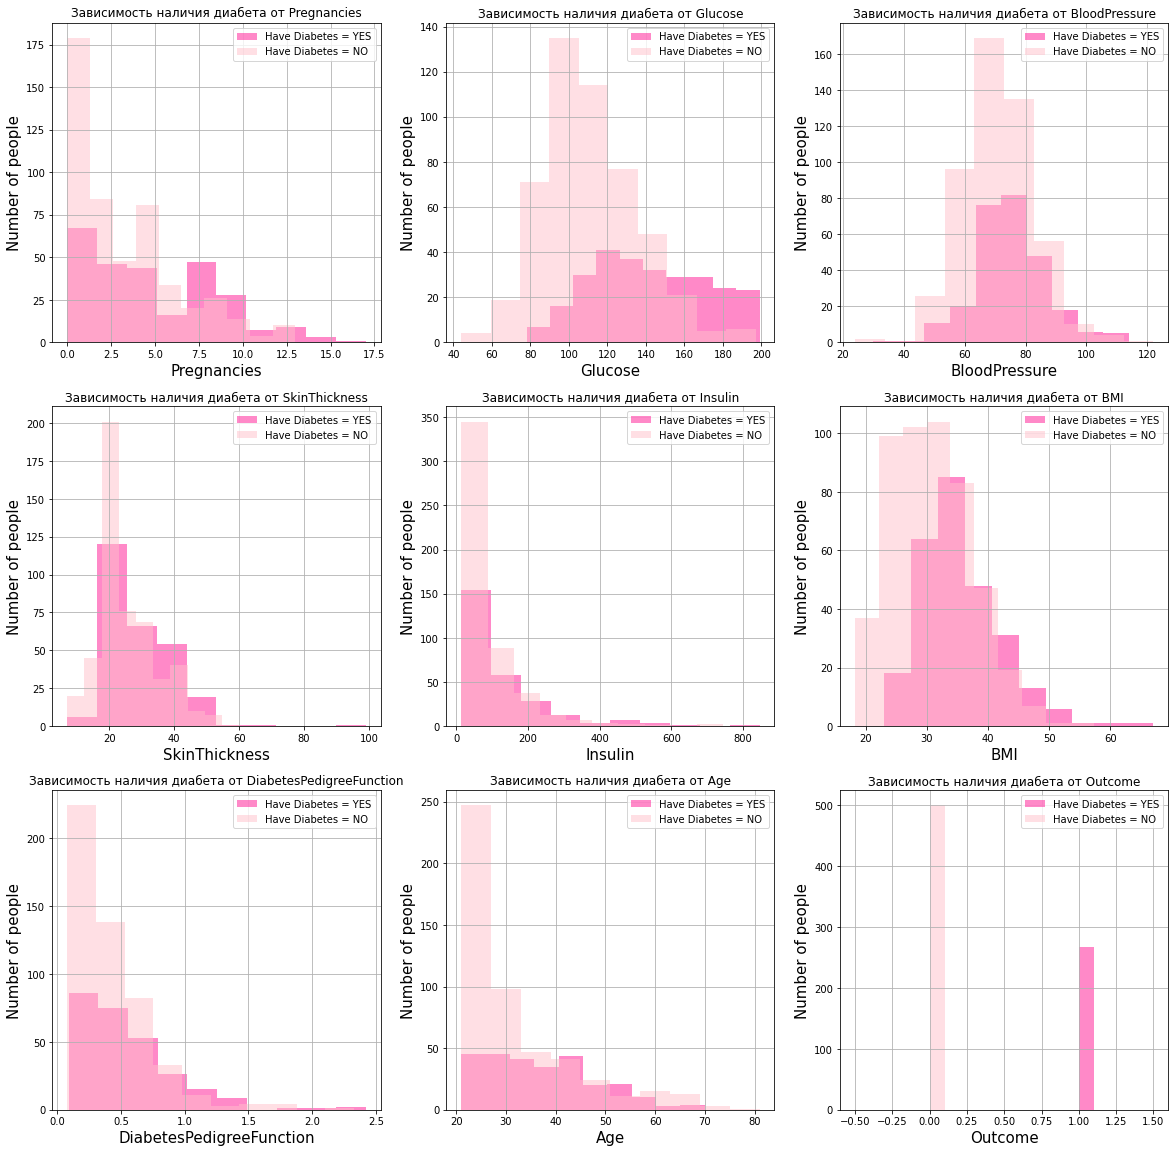

In [31]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for i, c in enumerate(data.columns):
  plt.subplot(3, 3, i + 1)
  data[c][data['Outcome'] == 1].hist(color = 'deeppink', alpha = 0.5, lw=5)
  data[c][data['Outcome'] == 0].hist(color = 'pink', alpha = 0.5, lw=5)
  plt.xlabel(str(c), fontsize = 15)
  plt.ylabel('Number of people', fontsize = 15)
  plt.title('Зависимость наличия диабета от ' + str(c))
  plt.legend(['Have Diabetes = YES', 'Have Diabetes = NO'], loc = 1)

plt.show()

В целом графики схожи с данными в качестве образцов.

### Задание 3.

Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите BaggingClassifier на деревьях (поставьте параметр base_estimator = DecisionTreeClassifier()) и RandomForest. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

Разделим датасет на train и test:

In [33]:
X = data.drop('Outcome', axis=1)
y = data.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537,), (231,))

BaggingClassifier:

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 10).fit(X_train, y_train)

print("BaggingClassifier:")
print("accuracy = ", accuracy_score(bag_clf.predict(X_test), y_test))
print("recall = ", recall_score(bag_clf.predict(X_test), y_test))
print("precision = ", precision_score(bag_clf.predict(X_test), y_test))

BaggingClassifier:
accuracy =  0.7489177489177489
recall =  0.6984126984126984
precision =  0.5301204819277109


RandomForest:

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)

print("RandomForest:")
print("accuracy = ", accuracy_score(rf_clf.predict(X_test), y_test))
print("recall = ", recall_score(rf_clf.predict(X_test), y_test))
print("precision = ", precision_score(rf_clf.predict(X_test), y_test))

RandomForest:
accuracy =  0.7575757575757576
recall =  0.7288135593220338
precision =  0.5180722891566265


Результаты моделий: у случайного леса больше accuracy и recall, но precision немного меньше, чем у бэггинга на деревьях => случайный лес луччше.

Возможное объяснение: при построении каждого дерева в случайном лесе мы *при каждом разбиении* ищем лучший предикат среди случайного подмножества всех признаков из датасета. Благодаря этому уменьшается корреляция между отдельными деревьями, так что модель будет более устойчивой.




### Задание 4.

Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
*   n_estimators (можно перебрать около 10 значений из отрезка от 10 до 1500)
*   min_samples_leaf (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

Зависимость ROC-AUC для случайного леса от изменения параметра n_estimators:

In [36]:
from sklearn.metrics import roc_auc_score

# Код по примеру семинара "Градиентный бустинг и бэггинг"!!!
for n_estimators in range(10, 1511, 150):
  rf_clf = RandomForestClassifier(n_estimators = n_estimators).fit(X_train, y_train)
  print (n_estimators, 'trees: train ROC-AUC =',  roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:,1]), '; test ROC-AUC =',  roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))

10 trees: train ROC-AUC = 0.9990248771498771 ; test ROC-AUC = 0.8088570498209052
160 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8332790621947248
310 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8404021491370889
460 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8369423640507978
610 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8379192445457506
760 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8407684793226962
910 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8349071963529795
1060 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8376750244220124
1210 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.840076522305438
1360 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8329534353630739
1510 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8367795506349723


Визулизируем зависимость:

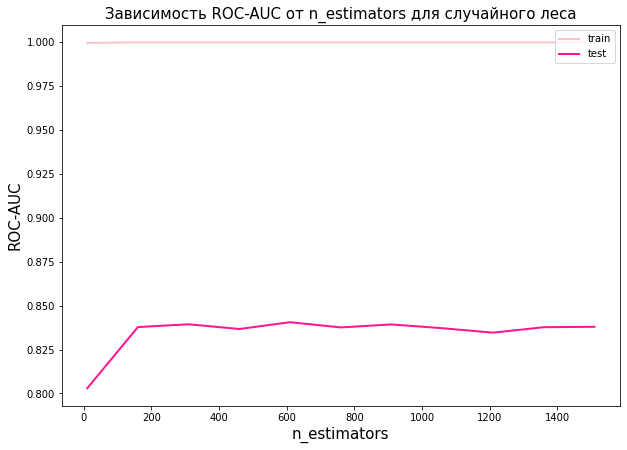

In [40]:
train_roc_auc = [] # Для хранения roc_auc для каждго леса с заданным кол-вом деревьев
test_roc_auc = []
n_estimators_array = range(10, 1511, 150)
for n in n_estimators_array:
  rf_clf = RandomForestClassifier(n_estimators = n).fit(X_train, y_train) 
  train_roc_auc.append(roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:,1]))  # Добавляем в соответствующий список вычисленную roc_auc
  test_roc_auc.append(roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))

plt.figure(figsize = (10,7))
plt.plot(n_estimators_array, train_roc_auc, c = 'pink', linewidth = 2)
plt.plot(n_estimators_array, test_roc_auc, c = 'deeppink', linewidth = 2)
plt.legend(['train', 'test'], loc = 1)
plt.title('Зависимость ROC-AUC от n_estimators для случайного леса', fontsize = 15)
plt.xlabel('n_estimators', fontsize = 15)
plt.ylabel('ROC-AUC', fontsize = 15)
plt.show()

Теперь рассмотрим зависимость ROC-AUC для случайного леса от изменения параметра min_samples_leaf:

In [37]:
for min_samples_leaf in range(1, 21):
  rf_clf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = min_samples_leaf).fit(X_train, y_train)
  print (min_samples_leaf, 'leaves: train ROC-AUC =',  roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:,1]), '; test ROC-AUC =',  roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))

1 leaves: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8332383588407685
2 leaves: train ROC-AUC = 0.9989864864864866 ; test ROC-AUC = 0.8442282644089872
3 leaves: train ROC-AUC = 0.990218058968059 ; test ROC-AUC = 0.843536307391729
4 leaves: train ROC-AUC = 0.9789004914004915 ; test ROC-AUC = 0.8447574080104201
5 leaves: train ROC-AUC = 0.9660626535626535 ; test ROC-AUC = 0.8412569195701726
6 leaves: train ROC-AUC = 0.9557432432432431 ; test ROC-AUC = 0.8471996092478019
7 leaves: train ROC-AUC = 0.9492014742014742 ; test ROC-AUC = 0.8458971019211983
8 leaves: train ROC-AUC = 0.9377610565110566 ; test ROC-AUC = 0.840198632367307
9 leaves: train ROC-AUC = 0.9289312039312039 ; test ROC-AUC = 0.8417453598176489
10 leaves: train ROC-AUC = 0.9252303439803439 ; test ROC-AUC = 0.8441875610550309
11 leaves: train ROC-AUC = 0.9209920147420148 ; test ROC-AUC = 0.8421523933572126
12 leaves: train ROC-AUC = 0.9147573710073711 ; test ROC-AUC = 0.8456528817974601
13 leaves: train ROC-AUC = 0.91142506142506

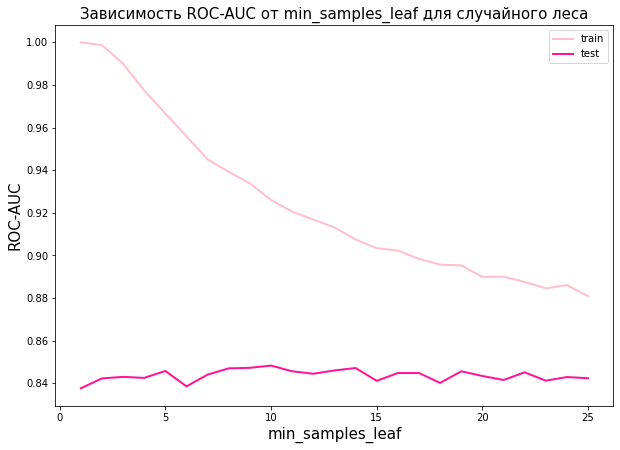

In [39]:
train_roc_auc = []
test_roc_auc = []
min_samples_leaf_array = range(1, 26)
for m in min_samples_leaf_array:
  rf_clf = RandomForestClassifier(n_estimators = 200, min_samples_leaf = m).fit(X_train, y_train)
  train_roc_auc.append(roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:,1]))
  test_roc_auc.append(roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))

plt.figure(figsize = (10,7))
plt.plot(min_samples_leaf_array, train_roc_auc, c = 'pink', linewidth = 2)
plt.plot(min_samples_leaf_array, test_roc_auc, c = 'deeppink', linewidth = 2)
plt.legend(['train', 'test'], loc = 1)
plt.title('Зависимость ROC-AUC от min_samples_leaf для случайного леса', fontsize = 15)
plt.xlabel('min_samples_leaf', fontsize = 15)
plt.ylabel('ROC-AUC', fontsize = 15)
plt.show()

#### Выводы:
*   ROC-AUC для обучающей выборки не зависит от количества деревьев n_estimators: только для 10 деревьев ROC-AUC чуть меньше единицы, для остальных же - единица. Для тестовой выборки ROC-AUC заметно растет примерно до 180 деревьев и далее меняется незначительно около 0,837.
*   ROC-AUC от минимального кол-ва объектов в листьях min_samples_leaf для обучающей выборки зависит обратно пропорционально: чем больше объектов в листьях, тем меньше ROC-AUC, причем ROC-AUC уменьшается довольно быстро. Для тестовой выборки ROC-AUC не так сильно зависит от min_samples_leaf, значения ROC-AUC колеблятся около 0.844, причем чем больше min_samples_leaf, тем меньше эти колебания.

### Задание 5.
Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

In [44]:
rf_clf = RandomForestClassifier(n_estimators = 10).fit(X_train, y_train)

f_imp = rf_clf.feature_importances_ # Атрибут из sklearn для оценки важности признаков
ind = np.argsort(f_imp)[::-1] # Индексы, сортирующие элементы f_imp (в порядке убывания)
names = [data.columns[i] for i in ind] # Упорядочим признаки, чтобы они соответствовали значениям отсортированных функций

print("Feature ranking:")
for f in range(X.shape[1]):
  print("%d. Importance of %s = %f" % (f + 1, names[f], f_imp[ind[f]]))

Feature ranking:
1. Importance of Glucose = 0.273461
2. Importance of BMI = 0.163830
3. Importance of Age = 0.139871
4. Importance of DiabetesPedigreeFunction = 0.108841
5. Importance of BloodPressure = 0.095369
6. Importance of Insulin = 0.081467
7. Importance of SkinThickness = 0.069065
8. Importance of Pregnancies = 0.068096


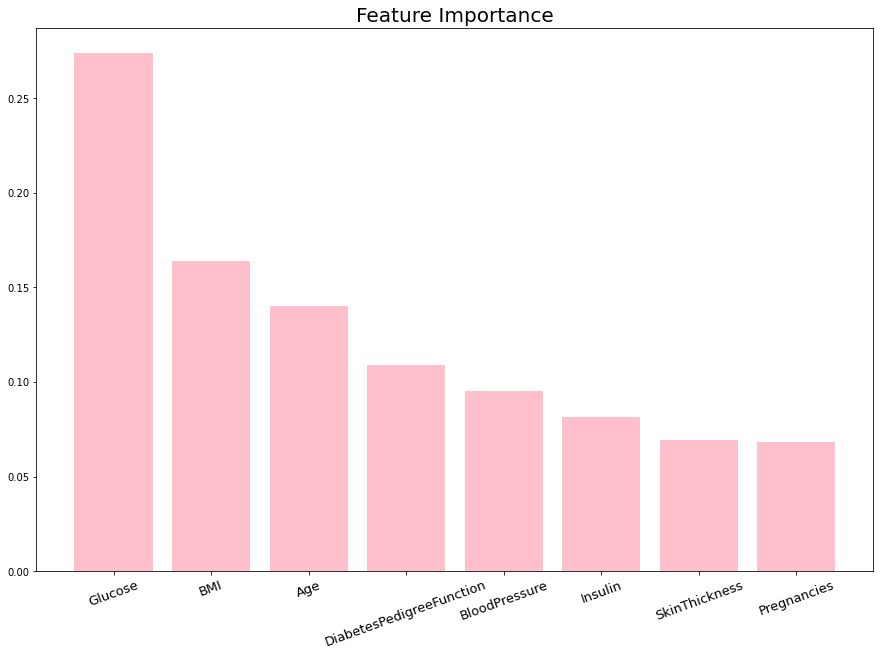

In [45]:
plt.figure(figsize = (15,10))
plt.bar(range(X.shape[1]), f_imp[ind], color = "pink")
plt.xticks(range(X.shape[1]), names, rotation = 20, fontsize = 13)
plt.title("Feature Importance", fontsize = 20)
plt.show()

Таким образом, самые важные признаки - это глюкоза, BMI и возраст.

### Задание 6.
Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.



GradientBoostingClassifier:

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators = 10, warm_start = True).fit(X_train, y_train)

print("GradientBoostingClassifier:")
print("accuracy = ", accuracy_score(gb_clf.predict(X_test), y_test))
print("recall = ", recall_score(gb_clf.predict(X_test), y_test))
print("precision = ", precision_score(gb_clf.predict(X_test), y_test))

GradientBoostingClassifier:
accuracy =  0.7445887445887446
recall =  0.6875
precision =  0.5301204819277109


Посмотрим, что будет при изменении кол-ва деревьев:

In [47]:
print("GradientBoostingClassifier:")

for n_estimators in range(10, 1511, 150):
  gb_clf = GradientBoostingClassifier(n_estimators = n_estimators, warm_start = True).fit(X_train, y_train)
  print (n_estimators, 'trees: train ROC-AUC =',  roc_auc_score(y_train, gb_clf.predict_proba(X_train)[:,1]), '; test ROC-AUC =',  roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:,1]),
         "; accuracy = ", accuracy_score(gb_clf.predict(X_test), y_test), "; recall = ", recall_score(gb_clf.predict(X_test), y_test),
         "; precision = ", precision_score(gb_clf.predict(X_test), y_test))

GradientBoostingClassifier:
10 trees: train ROC-AUC = 0.8963682432432433 ; test ROC-AUC = 0.8351107131227613 ; accuracy =  0.7445887445887446 ; recall =  0.6875 ; precision =  0.5301204819277109
160 trees: train ROC-AUC = 0.9989711302211302 ; test ROC-AUC = 0.8371051774666233 ; accuracy =  0.7748917748917749 ; recall =  0.7123287671232876 ; precision =  0.6265060240963856
310 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8333604689026376 ; accuracy =  0.7705627705627706 ; recall =  0.6923076923076923 ; precision =  0.6506024096385542
460 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8278248127645718 ; accuracy =  0.7662337662337663 ; recall =  0.6746987951807228 ; precision =  0.6746987951807228
610 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.826522305437968 ; accuracy =  0.7662337662337663 ; recall =  0.6746987951807228 ; precision =  0.6746987951807228
760 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8248127645718007 ; accuracy =  0.7575757575757576 ; recall =  0.6588235294117647 

Визуализируем зависимости ROC-AUC, accuracy, recall и precision от изменения параметра n_estimators:

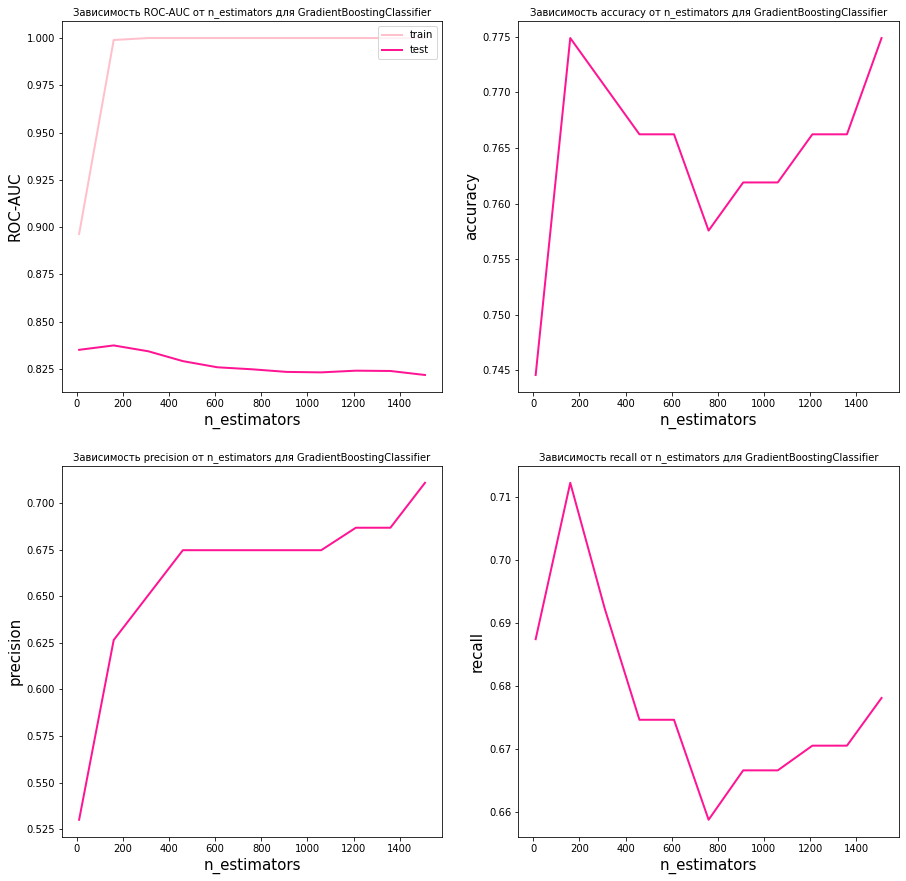

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

train_roc_auc = []
test_roc_auc = []
accuracy = []
precision = []
recall = []
n_estimators_array = range(10, 1511, 150)

for n in n_estimators_array:
  gb_clf = GradientBoostingClassifier(n_estimators = n, warm_start = True).fit(X_train, y_train)
  # Для ROC-AUC:
  train_roc_auc.append(roc_auc_score(y_train, gb_clf.predict_proba(X_train)[:,1]))
  test_roc_auc.append(roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:,1]))
  # Для accuracy:
  accuracy.append(accuracy_score(gb_clf.predict(X_test), y_test))
  # Для precision:
  precision.append(precision_score(gb_clf.predict(X_test), y_test))
  # Для recall:
  recall.append(recall_score(gb_clf.predict(X_test), y_test))

# Для ROC-AUC:
plt.subplot(2, 2, 1)
plt.plot(n_estimators_array, train_roc_auc, c = 'pink', linewidth = 2)
plt.plot(n_estimators_array, test_roc_auc, c = 'deeppink', linewidth = 2)
plt.legend(['train', 'test'], loc = 1)
plt.title('Зависимость ROC-AUC от n_estimators для GradientBoostingClassifier', fontsize = 10)
plt.xlabel('n_estimators', fontsize = 15)
plt.ylabel('ROC-AUC', fontsize = 15)

# Для accuracy:
plt.subplot(2, 2, 2)
plt.plot(n_estimators_array, accuracy, c = 'deeppink', linewidth = 2)
plt.title('Зависимость accuracy от n_estimators для GradientBoostingClassifier', fontsize = 10)
plt.xlabel('n_estimators', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

# Для precision:
plt.subplot(2, 2, 3)
plt.plot(n_estimators_array, precision, c = 'deeppink', linewidth = 2)
plt.title('Зависимость precision от n_estimators для GradientBoostingClassifier', fontsize = 10)
plt.xlabel('n_estimators', fontsize = 15)
plt.ylabel('precision', fontsize = 15)

# Для recall:
plt.subplot(2, 2, 4)
plt.plot(n_estimators_array, recall, c = 'deeppink', linewidth = 2)
plt.title('Зависимость recall от n_estimators для GradientBoostingClassifier', fontsize = 10)
plt.xlabel('n_estimators', fontsize = 15)
plt.ylabel('recall', fontsize = 15)

plt.show()

Таким образом оптимально брать примерно 600 базовых моделей.

Теперь рассмотрим HistGradientBoostingClassifier:

для регулирования кол-ва деревьев используем max_iter


In [49]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb_clf = HistGradientBoostingClassifier(max_iter = 10).fit(X_train, y_train)

print("HistGradientBoostingClassifier:")
print("accuracy = ", accuracy_score(hgb_clf.predict(X_test), y_test))
print("recall = ", recall_score(hgb_clf.predict(X_test), y_test))
print("precision = ", precision_score(hgb_clf.predict(X_test), y_test))

HistGradientBoostingClassifier:
accuracy =  0.7662337662337663
recall =  0.7230769230769231
precision =  0.5662650602409639


Визуализируем зависимости ROC-AUC, accuracy, recall и precision от изменения параметра max_iter:

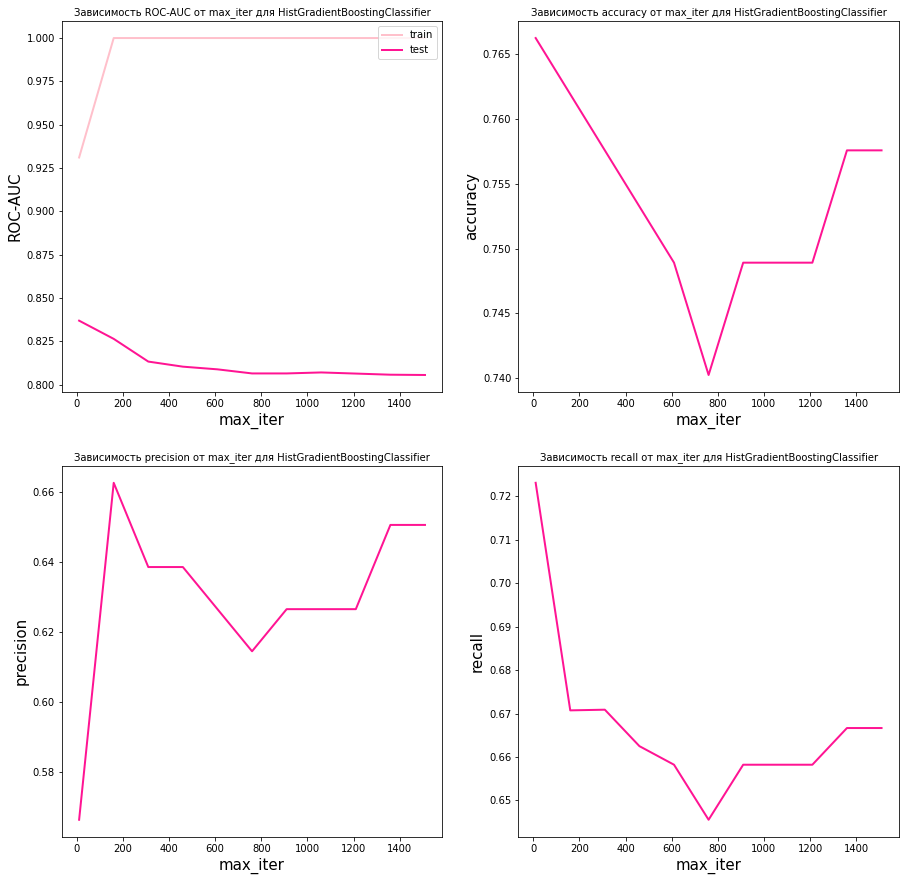

In [50]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

train_roc_auc1 = []
test_roc_auc1 = []
accuracy1 = []
precision1 = []
recall1 = []
max_iter_array = range(10, 1511, 150)

for m in max_iter_array:
  hgb_clf = HistGradientBoostingClassifier(max_iter = m).fit(X_train, y_train)
  # Для ROC-AUC:
  train_roc_auc1.append(roc_auc_score(y_train, hgb_clf.predict_proba(X_train)[:,1]))
  test_roc_auc1.append(roc_auc_score(y_test, hgb_clf.predict_proba(X_test)[:,1]))
  # Для accuracy:
  accuracy1.append(accuracy_score(hgb_clf.predict(X_test), y_test))
  # Для precision:
  precision1.append(precision_score(hgb_clf.predict(X_test), y_test))
  # Для recall:
  recall1.append(recall_score(hgb_clf.predict(X_test), y_test))

# Для ROC-AUC:
plt.subplot(2, 2, 1)
plt.plot(max_iter_array, train_roc_auc1, c = 'pink', linewidth = 2)
plt.plot(max_iter_array, test_roc_auc1, c = 'deeppink', linewidth = 2)
plt.legend(['train', 'test'], loc = 1)
plt.title('Зависимость ROC-AUC от max_iter для HistGradientBoostingClassifier', fontsize = 10)
plt.xlabel('max_iter', fontsize = 15)
plt.ylabel('ROC-AUC', fontsize = 15)

# Для accuracy:
plt.subplot(2, 2, 2)
plt.plot(max_iter_array, accuracy1, c = 'deeppink', linewidth = 2)
plt.title('Зависимость accuracy от max_iter для HistGradientBoostingClassifier', fontsize = 10)
plt.xlabel('max_iter', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

# Для precision:
plt.subplot(2, 2, 3)
plt.plot(max_iter_array, precision1, c = 'deeppink', linewidth = 2)
plt.title('Зависимость precision от max_iter для HistGradientBoostingClassifier', fontsize = 10)
plt.xlabel('max_iter', fontsize = 15)
plt.ylabel('precision', fontsize = 15)

# Для recall:
plt.subplot(2, 2, 4)
plt.plot(max_iter_array, recall1, c = 'deeppink', linewidth = 2)
plt.title('Зависимость recall от max_iter для HistGradientBoostingClassifier', fontsize = 10)
plt.xlabel('max_iter', fontsize = 15)
plt.ylabel('recall', fontsize = 15)

plt.show()

Теперь совмести графики для HistGradientBoostingClassifier и GradientBoostingClassifier:

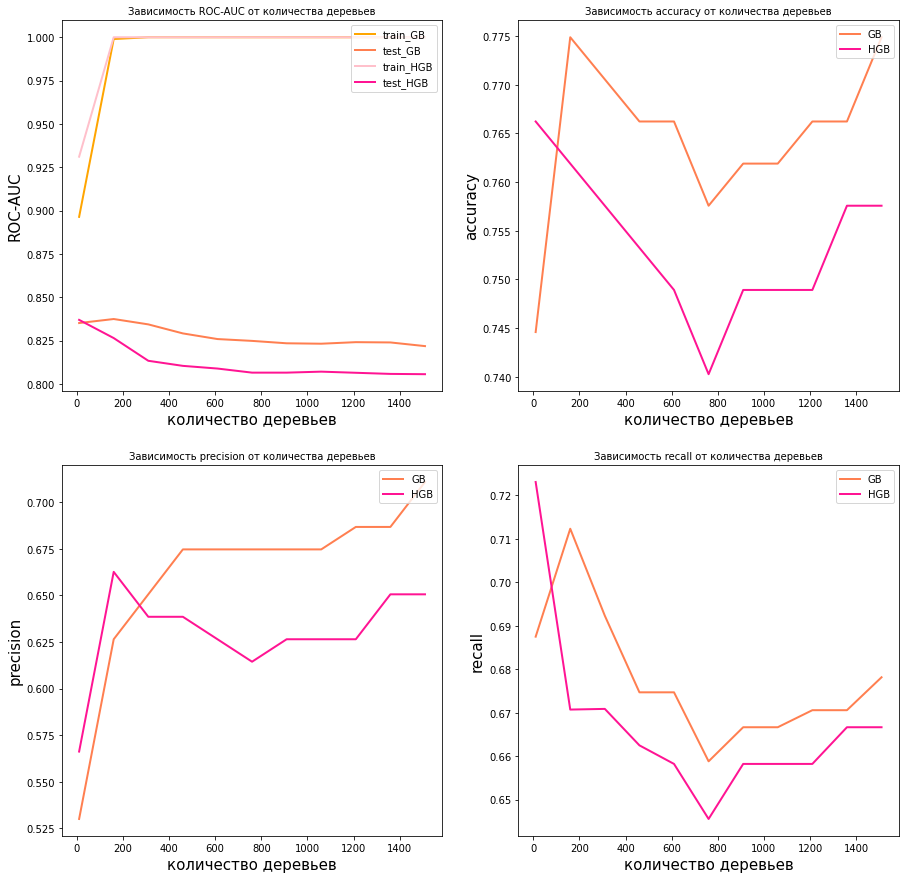

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Для ROC-AUC:
plt.subplot(2, 2, 1)
plt.plot(n_estimators_array, train_roc_auc, c = 'orange', linewidth = 2)
plt.plot(n_estimators_array, test_roc_auc, c = 'coral', linewidth = 2)
plt.plot(max_iter_array, train_roc_auc1, c = 'pink', linewidth = 2)
plt.plot(max_iter_array, test_roc_auc1, c = 'deeppink', linewidth = 2)
plt.legend(['train_GB', 'test_GB','train_HGB', 'test_HGB'], loc = 1)
plt.title('Зависимость ROC-AUC от количества деревьев', fontsize = 10)
plt.xlabel('количество деревьев', fontsize = 15)
plt.ylabel('ROC-AUC', fontsize = 15)

# Для accuracy:
plt.subplot(2, 2, 2)
plt.plot(n_estimators_array, accuracy, c = 'coral', linewidth = 2)
plt.plot(max_iter_array, accuracy1, c = 'deeppink', linewidth = 2)
plt.legend(['GB', 'HGB'], loc = 1)
plt.title('Зависимость accuracy от количества деревьев', fontsize = 10)
plt.xlabel('количество деревьев', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

# Для precision:
plt.subplot(2, 2, 3)
plt.plot(n_estimators_array, precision, c = 'coral', linewidth = 2)
plt.plot(max_iter_array, precision1, c = 'deeppink', linewidth = 2)
plt.legend(['GB', 'HGB'], loc = 1)
plt.title('Зависимость precision от количества деревьев', fontsize = 10)
plt.xlabel('количество деревьев', fontsize = 15)
plt.ylabel('precision', fontsize = 15)

# Для recall:
plt.subplot(2, 2, 4)
plt.plot(n_estimators_array, recall, c = 'coral', linewidth = 2)
plt.plot(max_iter_array, recall1, c = 'deeppink', linewidth = 2)
plt.legend(['GB', 'HGB'], loc = 1)
plt.title('Зависимость recall от количества деревьев', fontsize = 10)
plt.xlabel('количество деревьев', fontsize = 15)
plt.ylabel('recall', fontsize = 15)

plt.show()

Обычный градиентный бустинг показал себя лучше для большого кол-ва деревьем, HGB же дает лучшее качество для меньшего кол-ва деревьев (приверно 100-180 деревьев)

### Задание 7.

Вспомните, что представляет собой стэкинг моделей. Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [0]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

Будем обучать модели на 150 деревьях, т.к. примерно на этой цифре было лучшее качество моделей.
В качестве простого классфикатора возьмем knn, из ансамблем рассмотрим бэггинг, случайный лес и градиентный бустинг:

#### 1. Бэггинг + knn:

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Список базовых алгоритмов
base_learners1 = [
              ('bag_clf', BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 150)),
              ('knn_clf', make_pipeline(StandardScaler(), KNeighborsClassifier()))] # knn дополнительно масштабируем

clf1 = StackingClassifier(estimators = base_learners1, final_estimator=LogisticRegression()).fit(X_train, y_train)

Сравним качество такого стэкинга с обычным бэггингом для того же кол-ва деревьев:

In [79]:
bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 150).fit(X_train, y_train)

print("StackingClassifier:")
print ('for 150 trees: train ROC-AUC =',  roc_auc_score(y_train, clf1.predict_proba(X_train)[:,1]), '; test ROC-AUC =',  roc_auc_score(y_test, clf1.predict_proba(X_test)[:,1]),
         "; accuracy = ", accuracy_score(clf1.predict(X_test), y_test), "; recall = ", recall_score(clf1.predict(X_test), y_test),
         "; precision = ", precision_score(clf1.predict(X_test), y_test))

print("\nBaggingClassifier:")
print ('for 150 trees: train ROC-AUC =',  roc_auc_score(y_train, bag_clf.predict_proba(X_train)[:,1]), '; test ROC-AUC =',  roc_auc_score(y_test, bag_clf.predict_proba(X_test)[:,1]),
         "; accuracy = ", accuracy_score(bag_clf.predict(X_test), y_test), "; recall = ", recall_score(bag_clf.predict(X_test), y_test),
         "; precision = ", precision_score(bag_clf.predict(X_test), y_test))

StackingClassifier:
for 150 trees: train ROC-AUC = 0.9999692874692875 ; test ROC-AUC = 0.8326685118853794 ; accuracy =  0.7619047619047619 ; recall =  0.6944444444444444 ; precision =  0.6024096385542169

BaggingClassifier:
for 150 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8245278410941062 ; accuracy =  0.7575757575757576 ; recall =  0.6666666666666666 ; precision =  0.6506024096385542


precision у обычного бэггинга много лучше, чем у модели стэкинга. Во всем остальном стэкинг дает лучший результат при данном кол-ве деревьев.

#### 2. Случайный лес + knn:

In [80]:
base_learners2 = [
              ('rf_clf', RandomForestClassifier(n_estimators = 150)),
              ('knn_clf', make_pipeline(StandardScaler(), KNeighborsClassifier()))] # knn дополнительно масштабируем

clf2 = StackingClassifier(estimators = base_learners2, final_estimator=LogisticRegression()).fit(X_train, y_train)

rf_clf = RandomForestClassifier(n_estimators = 150).fit(X_train, y_train)

print("StackingClassifier:")
print ('for 150 trees: train ROC-AUC =',  roc_auc_score(y_train, clf2.predict_proba(X_train)[:,1]), '; test ROC-AUC =',  roc_auc_score(y_test, clf2.predict_proba(X_test)[:,1]),
         "; accuracy = ", accuracy_score(clf2.predict(X_test), y_test), "; recall = ", recall_score(clf2.predict(X_test), y_test),
         "; precision = ", precision_score(clf2.predict(X_test), y_test))

print("\nRandomForestClassifier:")
print ('for 150 trees: train ROC-AUC =',  roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:,1]), '; test ROC-AUC =',  roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]),
         "; accuracy = ", accuracy_score(rf_clf.predict(X_test), y_test), "; recall = ", recall_score(rf_clf.predict(X_test), y_test),
         "; precision = ", precision_score(rf_clf.predict(X_test), y_test))

StackingClassifier:
for 150 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8354770433083686 ; accuracy =  0.7792207792207793 ; recall =  0.7285714285714285 ; precision =  0.6144578313253012

RandomForestClassifier:
for 150 trees: train ROC-AUC = 1.0 ; test ROC-AUC = 0.8330348420709867 ; accuracy =  0.7662337662337663 ; recall =  0.6986301369863014 ; precision =  0.6144578313253012


В данном случае стэкинг дает лучшее качество. 

#### 3. Градиентный бустинг + knn:

In [82]:
base_learners3 = [
              ('rf_clf', GradientBoostingClassifier(n_estimators = 150, warm_start = True)),
              ('knn_clf', make_pipeline(StandardScaler(), KNeighborsClassifier()))] # knn дополнительно масштабируем

clf3 = StackingClassifier(estimators = base_learners3, final_estimator=LogisticRegression()).fit(X_train, y_train)

gb_clf = GradientBoostingClassifier(n_estimators = 150, warm_start = True).fit(X_train, y_train)

print("StackingClassifier:")
print ('for 150 trees: train ROC-AUC =',  roc_auc_score(y_train, clf3.predict_proba(X_train)[:,1]), '; test ROC-AUC =',  roc_auc_score(y_test, clf3.predict_proba(X_test)[:,1]),
         "; accuracy = ", accuracy_score(clf3.predict(X_test), y_test), "; recall = ", recall_score(clf3.predict(X_test), y_test),
         "; precision = ", precision_score(clf3.predict(X_test), y_test))

print("GradientBoostingClassifier:")
print ('for 150 trees: train ROC-AUC =',  roc_auc_score(y_train, gb_clf.predict_proba(X_train)[:,1]), '; test ROC-AUC =',  roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:,1]),
         "; accuracy = ", accuracy_score(gb_clf.predict(X_test), y_test), "; recall = ", recall_score(gb_clf.predict(X_test), y_test),
         "; precision = ", precision_score(gb_clf.predict(X_test), y_test))

StackingClassifier:
for 150 trees: train ROC-AUC = 0.9941492628992629 ; test ROC-AUC = 0.8458156952132855 ; accuracy =  0.7835497835497836 ; recall =  0.7323943661971831 ; precision =  0.6265060240963856
GradientBoostingClassifier:
for 150 trees: train ROC-AUC = 0.9988482800982801 ; test ROC-AUC = 0.8382448713774014 ; accuracy =  0.7619047619047619 ; recall =  0.6842105263157895 ; precision =  0.6265060240963856


Сэкинг заметно лучше обычного градиентного бустинга.

Визуализируем зависимость обоих ансамблей от роста числа деревьев:

In [0]:
train_roc_auc = []
test_roc_auc = []
accuracy = []
precision = []
recall = []

train_roc_auc1 = []
test_roc_auc1 = []
accuracy1 = []
precision1 = []
recall1 = []

n_estimators_array = range(10, 1511, 150)

for n in n_estimators_array:
  # Градиентный бустинг
  gb_clf = GradientBoostingClassifier(n_estimators = n, warm_start = True).fit(X_train, y_train)
  # Для ROC-AUC:
  train_roc_auc.append(roc_auc_score(y_train, gb_clf.predict_proba(X_train)[:,1]))
  test_roc_auc.append(roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:,1]))
  # Для accuracy:
  accuracy.append(accuracy_score(gb_clf.predict(X_test), y_test))
  # Для precision:
  precision.append(precision_score(gb_clf.predict(X_test), y_test))
  # Для recall:
  recall.append(recall_score(gb_clf.predict(X_test), y_test))

  
  # Стэкинг градиентный бустинг + knn
  base_learners3 = [
              ('rf_clf', GradientBoostingClassifier(n_estimators = n, warm_start = True)),
              ('knn_clf', make_pipeline(StandardScaler(), KNeighborsClassifier()))] # knn дополнительно масштабируем
  clf3 = StackingClassifier(estimators = base_learners3, final_estimator=LogisticRegression()).fit(X_train, y_train)
  # Для ROC-AUC:
  train_roc_auc1.append(roc_auc_score(y_train, clf3.predict_proba(X_train)[:,1]))
  test_roc_auc1.append(roc_auc_score(y_test, clf3.predict_proba(X_test)[:,1]))
  # Для accuracy:
  accuracy1.append(accuracy_score(clf3.predict(X_test), y_test))
  # Для precision:
  precision1.append(precision_score(clf3.predict(X_test), y_test))
  # Для recall:
  recall1.append(recall_score(clf3.predict(X_test), y_test))

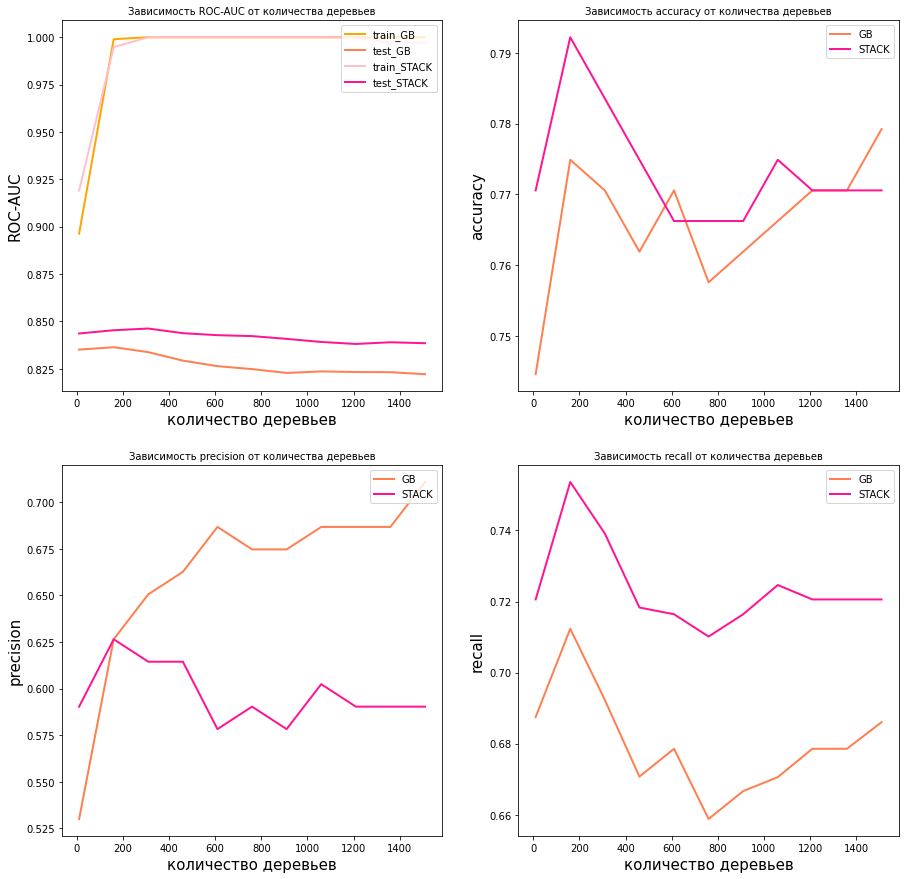

In [86]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Для ROC-AUC:
plt.subplot(2, 2, 1)
plt.plot(n_estimators_array, train_roc_auc, c = 'orange', linewidth = 2)
plt.plot(n_estimators_array, test_roc_auc, c = 'coral', linewidth = 2)
plt.plot(n_estimators_array, train_roc_auc1, c = 'pink', linewidth = 2)
plt.plot(n_estimators_array, test_roc_auc1, c = 'deeppink', linewidth = 2)
plt.legend(['train_GB', 'test_GB','train_STACK', 'test_STACK'], loc = 1)
plt.title('Зависимость ROC-AUC от количества деревьев', fontsize = 10)
plt.xlabel('количество деревьев', fontsize = 15)
plt.ylabel('ROC-AUC', fontsize = 15)

# Для accuracy:
plt.subplot(2, 2, 2)
plt.plot(n_estimators_array, accuracy, c = 'coral', linewidth = 2)
plt.plot(n_estimators_array, accuracy1, c = 'deeppink', linewidth = 2)
plt.legend(['GB', 'STACK'], loc = 1)
plt.title('Зависимость accuracy от количества деревьев', fontsize = 10)
plt.xlabel('количество деревьев', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

# Для precision:
plt.subplot(2, 2, 3)
plt.plot(n_estimators_array, precision, c = 'coral', linewidth = 2)
plt.plot(n_estimators_array, precision1, c = 'deeppink', linewidth = 2)
plt.legend(['GB', 'STACK'], loc = 1)
plt.title('Зависимость precision от количества деревьев', fontsize = 10)
plt.xlabel('количество деревьев', fontsize = 15)
plt.ylabel('precision', fontsize = 15)

# Для recall:
plt.subplot(2, 2, 4)
plt.plot(n_estimators_array, recall, c = 'coral', linewidth = 2)
plt.plot(n_estimators_array, recall1, c = 'deeppink', linewidth = 2)
plt.legend(['GB', 'STACK'], loc = 1)
plt.title('Зависимость recall от количества деревьев', fontsize = 10)
plt.xlabel('количество деревьев', fontsize = 15)
plt.ylabel('recall', fontsize = 15)

plt.show()

Таким образом, данный стэкинг в большинстве своем показывает себя лучше, за исключением precision со 150 деревьев. Также при 150 деревьях обе модели дают свои лучшии метрики.